<h1><center>𝓵𝓪𝓷𝓰𝓾𝓪𝓰𝓮 𝓶𝓸𝓭𝓮𝓵💖</center></h1>

[**ReaserachPaper**](https://proceedings.neurips.cc/paper/2014/file/a14ac55a4f27472c5d894ec1c3c743d2-Paper.pdf)

Sequence two Sequence models are helpful in machine tranlsation, speech recogonition. Here we our problem is machine translation we simply use the encoder and decoder network. In encoder we will give all the input in a particular time and it will convert them into some set of numbers and the decoder helps to generate the corresponding tranlated text. It also works for image captioning. 

Why this is good for this kind of tasks, because LSTM, RNN are good but it not good when we are giving multiple inputs and getting multiple outputs,they could lag when we are giving long input sentences and the accuracy is also not good. That's why we are using the sequence to sequence model. 


<img src="images/en.jpeg" width="800"/>

This is the basic representation of the seq2seq model. In language model the output may be random, to choose which likely the output, will use the machine translation model. The language model and machine tranlsation model having change in the architecutre (just slightly). In language model instead of giving the output the next layer, we will conserve the output, gather all and send it to the decoder. See the image! 

<img src="images/e.png" width="600"/>

This type of model is called **conditional model**, because it will give the probability of P(predicted sentece|input sentence) = good or bad., This conditinal probability is very usefull our aim to maximize the conditional probability for better translation. To increase the conditional probability we will use the **beam search algorithm**. 

<img src="images/brod.png" width="900"/>

<img src="images/super.png" width="600"/>

## Beam Search
Why beam search algo? In normal(encoder and decoder) model you will process all the data parallely so you might get the results parallely, but in language model you will pass the input to the encoder and it will change them to vector representation(in sequence) and you give to the decoder (generate the text), this is acutally a conditon based model, given that the french sentence and the preidcted sentence, our aim to maximaize the conditonal probabiltiy, to maximize the conditonal probability, we need to search the maximum value of the result of conditional probability, to search this we will use the **beam serach algorithm or heuristic algorithm**. 

**The first thing** the beam search will take the first output word and find the **probability of the word** using this network fragment(துண்டு): It will give the probability of the next word or english tranlation word, There is a parameter called **Beam width (B)** if you fix B = 3, it will take three possible words, if you fix 10 it will take ten possible words and it store it in the network for future use. 

<img src="images/frag.png" width=800/>

Consider our **B** is three, and our vocabulary size is 10k. Now we have three possible output from the first step, now we need to find what is the most likely word after the first word, for that we will compare all 10k -1 word in the voabaurlary with the input word and pass them in a neural fragment, and find the conditional probability for all 10k-1 records(this is for first possible word), then we need to do this for 2nd possible word and third possible word, check the image for better understanding. 


<img src='images/beam.png' width='800'/>


And after finding all the conditional probabilities, our beam serach algorithm will find top 3 maximum conditional probability because we specified **B** = 3. 

### $$ P(y<2>|X, "in") $$

y -> output of the neural fragment 

X -> input words (our case french) 

"in" -> first step output. 

Then now, we find three likely word for second word. After we need to find the third likely word of the first two word. Same like the previous step we need to comapre all the vocabulary words with the 3 ouputs of the second step and do all the conditional probability and save in the network, and do this process until how much sentence we having on input. 

<img src="images/last.png" widht="800"/>

## Length Normalization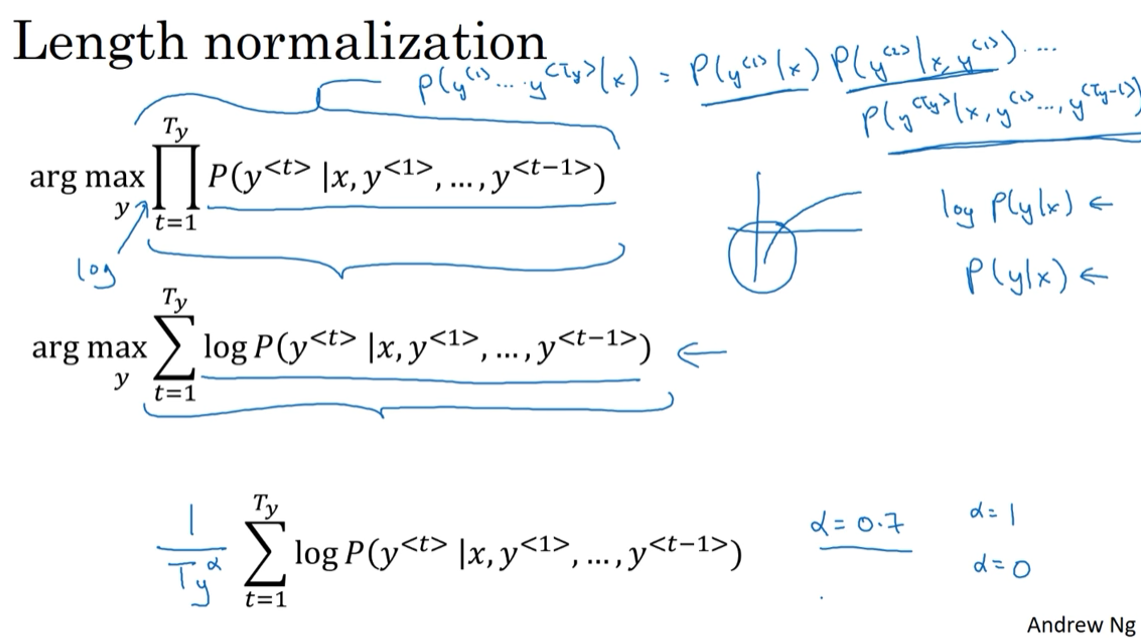

There are few more problems with the current beam search. We are multiplying lot's of small probability <=1, it will end up with the numerical underflow, we know how to overcome this, we will simply take the log of the current equation. Fine? No! Anohter one problem is also there, when you are multiplying lot's and lot's of small probabilites we end with very small number, that can't help to find the maximum conditional probability. Here is the solution, instead of taking maimum number,  we will take the average of the individual word probability calculations that helps us to get rid away from this all the problem. 

<img src="images/alph.png" width="600"/>

Here the alpha is the hyper parameter, if the alpha value is high that mean we are doing full lenght normalization, if it is half (vice versa). 

How to find the better **Beam width (B)**? -> If you choose **B** is high you will get good results but it is quite computationaly expensive, elif if you choose **B** is low it is computatinaly inexpensive but you will not get the good results. To find good **B** based on your applications, you should try lot's of differnt numbers and find it on your own.

## Error Analysis

Now we need to find the error of your beam search or rnn, sometimes getting more training data and increasing the **B** not help you get the good results, we need to find this problem is caused by rnn model or beam search. 

<img src="images/error.png" width="600"/>        <img src="images/ed.png" width="600"/>

**To evaluvate the language model we will use the Blue Score**.

**Dis-Advantage**: It is just a Unidirectional sturcture (it mean it does not get any future words, so it will problem at all) and the context vector don't have enough information from the past, so it could be serious damage. 


[**Codes for encoder and decoder Model**](https://github.com/somvirs57/seq2seq_fre_eng_translation/blob/master/Neural_Machine_Translation(fr-eng).ipynb)

[**Our Code**](https://colab.research.google.com/drive/1WLiYN2wGQJJQ_EecHSvsKyxqGB1oZcCw#scrollTo=DgJY2jYrj4cQ)